# Gather

In [1]:
#import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

In [2]:
insurance=pd.read_csv("insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


# Assess

In [3]:
###Make a copy of the original dataset
insu_copy=insurance.copy()

In [4]:
insu_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
## Check for null values
insu_copy.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

### The dataset has no null values

In [6]:
### Check for duplicated values
insu_copy.duplicated().sum()

1

In [7]:
#drop the duplicate values
insu_copy.drop_duplicates()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [8]:
#describe age column
insu_copy.age.describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

In [9]:
#divide the age column into groups
bin_edges=[17,26,38,50,64]
label_names=['Young_adults','Middle_adults','Senior_adults','Old_adults']
insu_copy['Age_groups']=pd.cut(insu_copy['age'],bin_edges,labels=label_names)

In [10]:
insu_copy

,age,sex,bmi,children,smoker,region,charges,Age_groups
0,19,female,27.900,0,yes,southwest,16884.92400,Young_adults
1,18,male,33.770,1,no,southeast,1725.55230,Young_adults
2,28,male,33.000,3,no,southeast,4449.46200,Middle_adults
3,33,male,22.705,0,no,northwest,21984.47061,Middle_adults
4,32,male,28.880,0,no,northwest,3866.85520,Middle_adults
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,Senior_adults
1334,18,female,31.920,0,no,northeast,2205.98080,Young_adults
1335,18,female,36.850,0,no,southeast,1629.83350,Young_adults
1336,21,female,25.800,0,no,southwest,2007.94500,Young_adults


In [11]:
insu_copy.bmi.describe()

count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64

In [12]:
##Group the bmi levels
bins=[15.96000,26.296249,30.399999,34.693749,53.130000]
label_names=['low','medium','moderate','high']
insu_copy['bmi_levels']=pd.cut(insu_copy['bmi'],bins,labels=label_names)

In [13]:
insu_copy

,age,sex,bmi,children,smoker,region,charges,Age_groups,bmi_levels
0,19,female,27.900,0,yes,southwest,16884.92400,Young_adults,medium
1,18,male,33.770,1,no,southeast,1725.55230,Young_adults,moderate
2,28,male,33.000,3,no,southeast,4449.46200,Middle_adults,moderate
3,33,male,22.705,0,no,northwest,21984.47061,Middle_adults,low
4,32,male,28.880,0,no,northwest,3866.85520,Middle_adults,medium
...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,Senior_adults,moderate
1334,18,female,31.920,0,no,northeast,2205.98080,Young_adults,moderate
1335,18,female,36.850,0,no,southeast,1629.83350,Young_adults,high
1336,21,female,25.800,0,no,southwest,2007.94500,Young_adults,low


# Exploratory data analysis

### Q1. How many smokers and non- smokers are there?

In [14]:
yes=insu_copy[insu_copy['smoker']=='yes']
no=insu_copy[insu_copy['smoker']=='no']
print(len(yes))
print(len(no))

274
1064


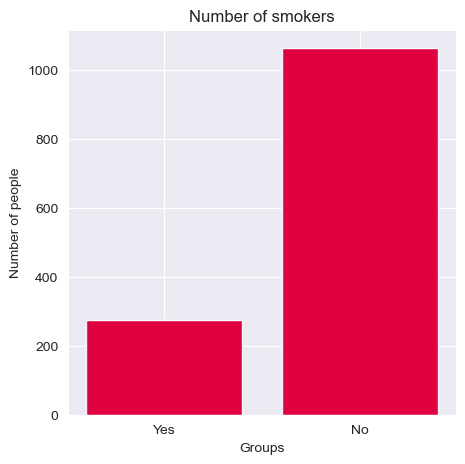

In [15]:
# Represent the above information on a bar graph
fig,ax=plt.subplots(figsize=(5,5))
label=['Yes','No']
smoker=[len(yes),len(no)]
locations=[1,2]
ax.bar(locations,smoker,tick_label=label,color='#E10040')
ax.set(title='Number of smokers',xlabel='Groups',ylabel='Number of people');

### There are more non-smokers than smokers

### Q2.What age groups do a majority of the smokers belong to?

In [16]:
yes.groupby('Age_groups')['age'].mean()

Age_groups
Young_adults     20.882353
Middle_adults    32.200000
Senior_adults    44.347222
Old_adults       57.593750
Name: age, dtype: float64

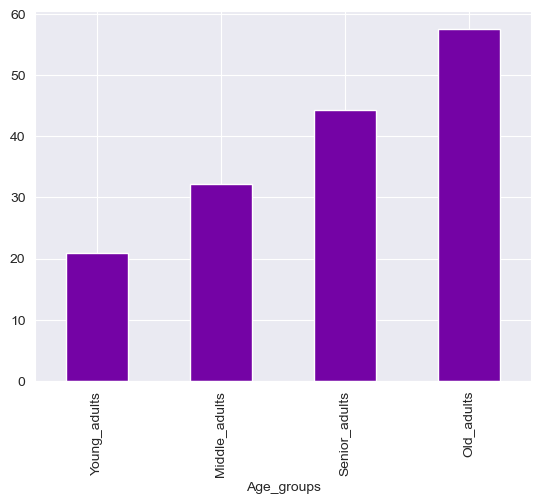

In [17]:
yes.groupby('Age_groups')['age'].mean().plot(kind='bar',color='#7403A5');

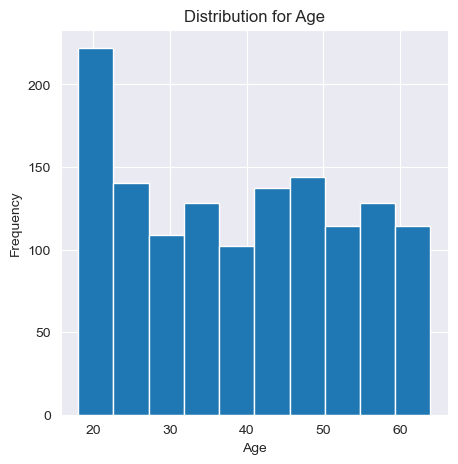

In [18]:
### Plot a histogram
fig,ax=plt.subplots(figsize=(5,5))
ax.hist(insu_copy.age)
ax.set(title='Distribution for Age',xlabel='Age',ylabel='Frequency');

### A majority of the smokers belong to the old_adults bracket and the young_adults are the least . 

### Q3. Which regions have the highest number of smokers and non smokers?

In [19]:
yes.groupby('region')['smoker'].count()

region
northeast    67
northwest    58
southeast    91
southwest    58
Name: smoker, dtype: int64

In [20]:
no.groupby('region')['smoker'].count()

region
northeast    257
northwest    267
southeast    273
southwest    267
Name: smoker, dtype: int64

### The southeast region has the highest number of smokers and both northwest and southwest have the highest number of non-smokers.

### Q4.Is their a relationship between age and bmi?

In [21]:
insu_copy.groupby('Age_groups')['bmi'].mean()

Age_groups
Young_adults     29.958862
Middle_adults    30.211095
Senior_adults    30.686426
Old_adults       31.703062
Name: bmi, dtype: float64

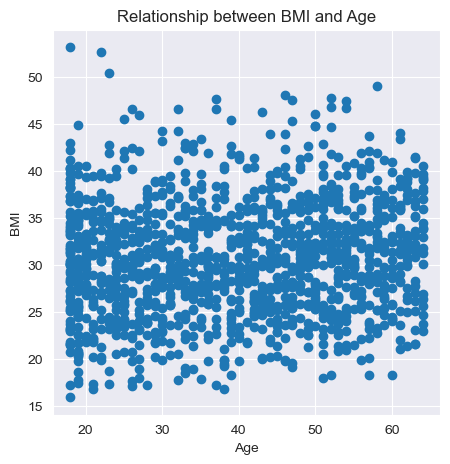

In [22]:
fig,ax=plt.subplots(figsize=(5,5))
ax.scatter(insu_copy.age,insu_copy.bmi)
ax.set(title='Relationship between BMI and Age',xlabel='Age',ylabel='BMI');

### Their is not that much of a relationship between age and bmi because their is a slight difference in their mean,older adults have a higher bmi compared to young adults

### Q4. Which sex group has the highest and lowest bmi?


In [23]:
insu_copy.groupby('sex')['bmi'].mean()

sex
female    30.377749
male      30.943129
Name: bmi, dtype: float64

### Females and males have almost the same bmi, although the male's bmi is higher seconded by females.

### Q5. Which age groups are charged the most and least?


In [24]:
insu_copy.groupby('Age_groups')['charges'].mean()

Age_groups
Young_adults      8839.442951
Middle_adults    11425.824223
Senior_adults    14312.495386
Old_adults       18084.987223
Name: charges, dtype: float64

### The old adults are charged the most and the young adults the least

### Q6. Is their a relationship between bmi and charges?


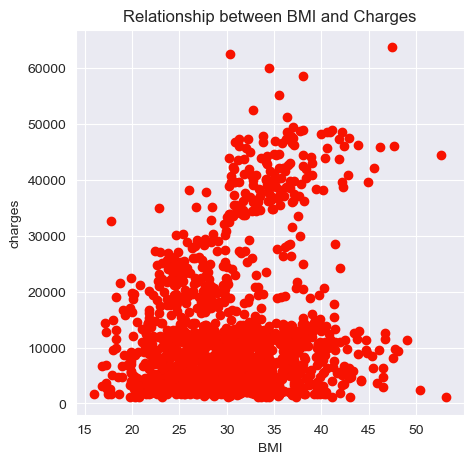

In [25]:
#Plot a scatter plot
fig,ax=plt.subplots(figsize=(5,5))
ax.scatter(insu_copy.bmi,insu_copy.charges,color='#F81200')
ax.set(title='Relationship between BMI and Charges',xlabel='BMI',ylabel='charges');

In [26]:
insu_copy.groupby('bmi_levels')['bmi','charges'].mean()

C:\Users\caleb\AppData\Local\Temp\ipykernel_12088\2595470525.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  insu_copy.groupby('bmi_levels')['bmi','charges'].mean()


,bmi,charges
bmi_levels,,
low,23.148548,10386.608533
medium,28.416607,11398.362224
moderate,32.439507,14323.550842
high,38.656970,16987.936691


### People with a higher bmi are charged more compared to those with less

### Q7. Do smokers and non-smokers have a higher bmi or not?

In [27]:
#get the mean for non-smokers
no.groupby('bmi_levels')['bmi'].mean()

bmi_levels
low         23.178156
medium      28.438731
moderate    32.449617
high        38.716744
Name: bmi, dtype: float64

In [28]:
#get the mean for smokers
yes.groupby('bmi_levels')['bmi'].mean()

bmi_levels
low         23.038873
medium      28.325385
moderate    32.394098
high        38.456688
Name: bmi, dtype: float64

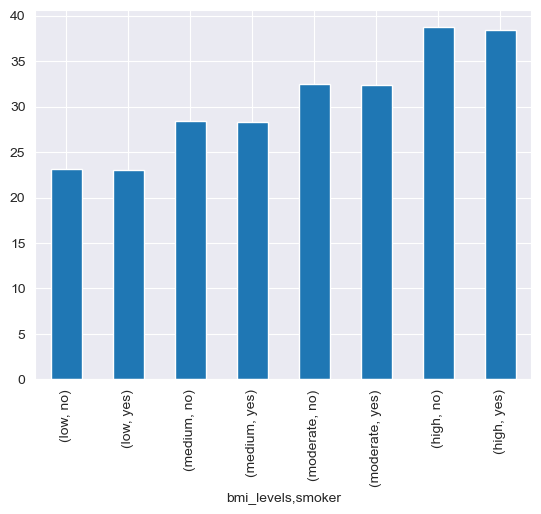

In [29]:
#Plot a bar graph comparing the bmi for smokers and non-smokers
insu_copy.groupby(['bmi_levels','smoker'])['bmi'].mean().plot(kind='bar');

### Both smokers and non-smokers have almost the same bmi


  ## According to my findings:
  ### Q1. Their are more non-smokers than smokers.
  ### Q2. A majority of the smokers belong to the old_adults bracket and the young_adults are the least 
  ### Q3. Their is not that much of a relationship between age and bmi because their is a slight difference in their mean,older adults have a higher bmi compared to young adults
  ### Q4. Females and males have almost the same bmi, although the male's bmi is higher  seconded by females.
  ### Q5. The old adults are charged the most and the young adults the least
  ### Q6. People with a higher bmi are charged more compared to those with less
  ### Q7. Both smokers and non-smokers have almost the same bmi
  
    

# Modelling with linear regression 

In [41]:
#Import the model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [42]:
#map out the dependant and independent variables
x=np.array(insu_copy.age).reshape((-1,1))
y=insu_copy.charges

In [43]:
#split the data into training and testing subsets
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)


In [44]:
model=LinearRegression(fit_intercept=True)
model.fit(x_train,y_train)

LinearRegression()

In [45]:
#coefficient of determination,𝑅²,with score() method on model
pd.options.display.float_format='{:.2f}'.format
co_train='{:.2f}'.format(model.score(x_train,y_train))
co_test='{:.2f}'.format(model.score(x_test,y_test))
print(f'Training set score {co_train}')
print(f'Test set score {co_test}')

Training set score 0.10
Test set score 0.06


> The training and set score are relatively low meaning that the model is not a good fit

In [46]:
predicted=model.predict(x_test)
actual_vs_predicted=pd.DataFrame({'Actual':y_test,'Predicted':predicted})
actual_vs_predicted.head()

,Actual,Predicted
1112,24180.93,15748.42
837,11657.72,17979.66
603,16085.13,20210.90
1064,5708.87,10449.23
1003,21232.18,15748.42


In [47]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [48]:
#find the mean absolute error
MAE=mean_absolute_error(y_true=y_test,y_pred=predicted)
MAE

9111.913541699663

In [49]:
#Calculate the mean squared error
MSE=mean_squared_error(y_true=y_test,y_pred=predicted)
MSE

134669100.61000136

In [40]:
#Get the root mean_squared error
RMSE=MSE**(1/2)
RMSE

11244.52406541571

In [41]:
#save the model
#import pickle
#pickle.dump(model,open('linear_regression_insurance.pkl','wb'))